In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')

# Exercise 10.11

In [2]:
def f(x):
    return 1 - np.exp(-2*x)

In [23]:
x_prev = -1
count = 0
error_estimate = True

print(f"Iter. \t Value \t \t Error Estimate")
print(f"{count} \t {x_prev:.6f} \t {error_estimate:.6f}")

while(np.abs(error_estimate) > 1e-6):
    x = f(x_prev)
    error_estimate = (x_prev - x)/(1 - 1/(-2*np.exp(-2*x_prev)))
    x_prev = x
    count += 1
    print(f"{count} \t {x:.6f} \t {error_estimate:.6f}")

Iter. 	 Value 	 	 Error Estimate
0 	 -1.000000 	 1.000000
1 	 -6.389056 	 5.047503
2 	 -354374.440984 	 354367.551939
3 	 -inf 	 inf
4 	 -inf 	 nan


C:\Users\leouh\AppData\Local\Temp\ipykernel_5536\3970693967.py:2: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-2*x)
C:\Users\leouh\AppData\Local\Temp\ipykernel_5536\3287693053.py:10: RuntimeWarning: overflow encountered in exp
  error_estimate = (x_prev - x)/(1 - 1/(-2*np.exp(-2*x_prev)))
C:\Users\leouh\AppData\Local\Temp\ipykernel_5536\3287693053.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  error_estimate = (x_prev - x)/(1 - 1/(-2*np.exp(-2*x_prev)))


In [38]:
x_prev = -1
w = 0.7
count = 0
error_estimate = True

print(f"Iter. \t Value \t \t Error Estimate")
print(f"{count} \t {x_prev:.6f} \t {error_estimate:.6f}")

while(np.abs(error_estimate) > 1e-6):
    x = (1 + w) * f(x_prev) - w * x_prev
    error_estimate = (x_prev - x)/(1 - 1/((1 - w) * -2 * np.exp(-2*x_prev) - w))
    x_prev = x
    count += 1
    print(f"{count} \t {x:.6f} \t {error_estimate:.6f}")

Iter. 	 Value 	 	 Error Estimate
0 	 -1.000000 	 1.000000
1 	 -10.161395 	 7.667714
2 	 -1139002799.981487 	 1139002786.986758
3 	 -inf 	 inf
4 	 nan 	 nan


C:\Users\leouh\AppData\Local\Temp\ipykernel_5536\3970693967.py:2: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-2*x)
C:\Users\leouh\AppData\Local\Temp\ipykernel_5536\473782932.py:11: RuntimeWarning: overflow encountered in exp
  error_estimate = (x_prev - x)/(1 - 1/((1 - w) * -2 * np.exp(-2*x_prev) - w))
C:\Users\leouh\AppData\Local\Temp\ipykernel_5536\473782932.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  x = (1 + w) * f(x_prev) - w * x_prev


# Exercise 10.13

In [41]:
def binary_search(f, x1, x2, accuracy, target, count=0):
    count += 1
    if np.sign(f(x1)) == np.sign(f(x2)):
        raise ValueError("f(x1) and f(x2) must have different signs")
    mid = (x1 + x2) / 2
    if np.abs(f(mid) - target) < accuracy:
        return mid, count
    elif np.sign(f(mid)) == np.sign(f(x1)):
        return binary_search(f, mid, x2, accuracy, target, count)
    else:
        return binary_search(f, x1, mid, accuracy, target, count)

In [42]:
def f3(x):
    return 5*np.exp(-x) + x - 5

In [101]:
x, count = binary_search(f3, -2, 1, 1e-6, 0)
x2, count2 = binary_search(f3, 1, 10, 1e-6, 0)

x, x2, count, count2

(2.384185791015625e-07, 4.965113878250122, 22, 22)

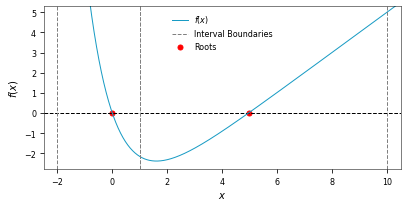

In [100]:
plt.axhline(0, color='k', ls='--')
plt.plot(np.linspace(-2, 10.5, 1000), f3(np.linspace(-2, 10.5, 1000)), label='$f(x)$')
plt.axvline(1, color='grey', ls='--', label='Interval Boundaries')
plt.axvline(-2, color='grey', ls='--')
plt.axvline(1, color='grey', ls='--')
plt.axvline(10, color='grey', ls='--')
plt.scatter(x, f3(x), color='r', s=25, label='Roots')
plt.scatter(x2, f3(x2), color='r', s=25)
plt.ylim(-2.8, 5.3)
plt.xlim(-2.5, 10.5)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.savefig('HW2_figures/f3_plot.png', dpi=300, bbox_inches='tight')

In [45]:
kB = 1.380649e-23
h = 6.626068e-34
c = 2.99792458e8
b = h*c/(kB*x)
b

0.0028977712212365256

In [47]:
T = b/502e-9
T

5772.45263194527

# Exercise 3

In [ ]:
### Numerical derivative from HW1
def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

### Gradient of two-dimensional function
def gradient(f, x, y):
    dfdx = central_difference(lambda x: f(x, y), x, 1e-4) # Partial derivative w.r.t. x
    dfdy = central_difference(lambda y: f(x, y), y, 1e-4) # Partial derivative w.r.t. y
    return np.array([dfdx, dfdy])

### Gradient descent algorithm
def gradient_descent(f, x0, y0, gamma, tolerance, max_iterations):
    x, y = x0, y0 # Initial guess
    for i in range(max_iterations):
        grad = gradient(f, x, y) # Compute gradient
        x_new = x - gamma * grad[0] # Update x
        y_new = y - gamma * grad[1] # Update y
        if np.linalg.norm(np.array([(x_new - x), (y_new - y)])) < tolerance: # Convergence check
            break
        x, y = x_new, y_new # Gradient descent update
    return x, y, i

### Test function
def f_test(x, y):
    return (x - 2)**2 + (y - 2)**2

In [ ]:
### Test the algorithm and play with parameters to optimize performance
gradient_descent(f_test, 3, 1, 0.4, 1e-6, 1000)

(2.0000005119999997, 1.9999994879999998, 9)

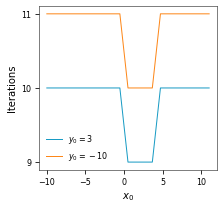

In [143]:
### Plot results
fig = plt.figure(figsize=(3.2,3))
x0s = np.linspace(-10, 11, 21)
y0s = np.ones_like(x0s) * 3
iterations = np.array([gradient_descent(f_test, x0, y0, 0.4, 1e-6, 1000)[2] for x0, y0 in zip(x0s, y0s)])
y0s_2 = np.ones_like(x0s) * -10
iterations_2 = np.array([gradient_descent(f_test, x0, y0, 0.4, 1e-6, 1000)[2] for x0, y0 in zip(x0s, y0s_2)])
plt.plot(x0s, iterations, '-', label=r'$y_0 = 3$')
plt.plot(x0s, iterations_2, '-', label=r'$y_0 = -10$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'Iterations')
plt.yticks([9,10,11])
# plt.title(r'Gradient Descent Convergence')
plt.legend()
plt.savefig('HW2_figures/gradient_descent_convergence.png', bbox_inches='tight')
plt.show()

In [21]:
### Load data
data = np.loadtxt('smf_cosmos.dat', unpack=True)
log_M_gal, n, error = data

### Calculate the stellar mass function in linear space but pass parameters in log space
def Schechter(log_M_gal, log_phi_star, log_M_star, alpha):
    phi_star = np.power(10,log_phi_star)
    M_star = np.power(10,log_M_star)
    M_gal = np.power(10,log_M_gal)
    return phi_star*np.power(M_gal/M_star,alpha+1)*np.exp(-M_gal/M_star)*np.log(10)

def chi_squared(params, x, y, error):
    model = Schechter(x, *params)
    chi2 = np.sum(((y - model) / error) ** 2)
    return chi2

### We have to re-write the gradient descent function a little to handle 3 parameters and the fact that chi^2 
### itself takes a function and data as input
def gradient_descent_2(vec_init, gamma, tolerance, max_iterations, h_init):
    chi2_values = []
    vec_prev = vec_init
    h = h_init

    for i in range(max_iterations):
        f_prev = Schechter(log_M_gal, *vec_prev) # This is f(x_{i-1})
        const = (n - f_prev) / error**2 # This is (y_i - f(x_{i-1}))/sigma_i^2 to be used in gradient calculation
        grad = np.zeros(3) # Prepare gradient array

        for j in range(3):
            params = vec_prev.copy() # Prepare parameter array for partial derivative
            params[j] += h # Increment the jth parameter by h
            f = Schechter(log_M_gal, *params)
            grad[j] = -2 * np.sum(const * (f - f_prev) / h) # Gradient component for jth parameter

        chi2_values.append(chi_squared(vec_prev, log_M_gal, n, error))
        vec = vec_prev - gamma * grad # Gradient descent update

        if np.linalg.norm(vec - vec_prev) < tolerance: # Convergence check
            break

        vec_prev = vec # Update previous parameters
    return vec, chi2_values, i

In [103]:
res = gradient_descent_2(np.array([-3.2, 9, -0.7]), 1e-4, 1e-4, 1000, 0.5)
res2 = gradient_descent_2(np.array([-2.1, 10, -0.2]), 1e-4, 1e-4, 1000, 0.5)
res3 = gradient_descent_2(np.array([-2.7, 11.2, -1.4]), 1e-4, 1e-4, 1000, 0.5)

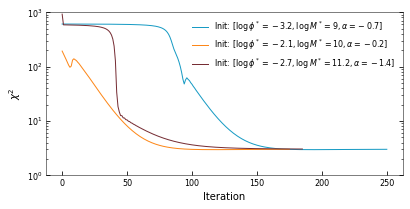

In [144]:
plt.figure(figsize=(6.4,3))
plt.plot(np.arange(res[2]+1), res[1], label=r'Init: $[\log{\phi^*} = -3.2, \log{M^*} = 9, \alpha = -0.7]$')
plt.plot(np.arange(res2[2]+1), res2[1], label=r'Init: $[\log{\phi^*} = -2.1, \log{M^*} = 10, \alpha = -0.2]$')
plt.plot(np.arange(res3[2]+1), res3[1], label=r'Init: $[\log{\phi^*} = -2.7, \log{M^*} = 11.2, \alpha = -1.4]$')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$\chi^2$')
plt.ylim(1, 1e3)
plt.gca().yaxis.set_ticks_position('both')
plt.gca().tick_params(axis='y', which='both', right=True, direction='in')
plt.gca().tick_params(axis='x', direction='in')
plt.legend()
# plt.title(r'$\chi^2$ Convergence for Different Initial Parameters')
plt.savefig('HW2_figures/chi2_convergence.png', dpi=300, bbox_inches='tight')
plt.show()

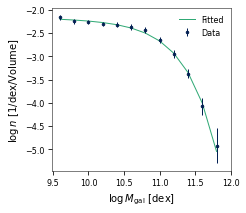

In [145]:
### Get best fit parameters and plot
res4 = gradient_descent_2(np.array([-2.6, 11, -1.1]), 1e-4, 1e-9, 1000, 0.5)
res4[0]

plt.figure(figsize=(3.2,3))
plt.plot(log_M_gal, np.log10(Schechter(log_M_gal, *res4[0])), '-', color='C3', label='Fitted')
plt.errorbar(log_M_gal, np.log10(n), yerr=error/n/np.log(10), fmt='o', color='C4', label='Data')
plt.xlabel(r'$\log{M_\mathrm{gal}}$ [dex]')
plt.ylabel(r'$\log{n}$ [1/dex/Volume]')
plt.xticks([9.5, 10, 10.5, 11, 11.5, 12])
plt.legend()
# plt.title('Galaxy Stellar Mass Function Fit')
plt.savefig('HW2_figures/fit.png', dpi=300, bbox_inches='tight')
plt.show()

In [146]:
res4[0]

array([-2.58881498, 10.9910845 , -1.02908634])